<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Fresnel-based DOE Stokes analyzer:fotodetector </font>
</div>

- **Fecha**: 2022/03/15
        
- **Autores**: 
    - Javier Alda
    - Luis Miguel Sánchez Brea

   
- **Estado**:  Development

- **Objetivos**: 
    - Generar los fotodetectores de forma independiente


# Importaciones

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import diffractio
import matplotlib as mpl

from diffractio import degrees, mm, plt, sp, um, np, nm
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.utils_drawing import draw_several_fields
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY
from diffractio.vector_fields_XY import Vector_field_XY

from diffractio.utils_drawing import draw_several_fields

In [3]:
from py_pol.jones_matrix import Jones_matrix
from py_pol.jones_vector import Jones_vector
from py_pol.stokes import Stokes

In [ ]:
from py_aocg.stokes_analyzer.stokes_analyzer import Stokes_analyzer, compute_stokes_mask, states_standard

In [ ]:
mpl.rcParams['figure.dpi'] = 100 #dpi
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.formatter.useoffset'] = False

In [ ]:
np.printoptions(precision=4);
import warnings
warnings.filterwarnings('ignore') 

### Generation of the Polarization State Analyzer with N fresnel zones

In [37]:
num_sectors = 6
focal = 125 * mm
r_shift = 1 * mm

detector_radius = 250*um
detector_size = 500*um

has_draw = True


In [38]:
num_pixels = 256

length = 4*mm
x0 = np.linspace(-length / 2, length / 2, num_pixels)
y0 = np.linspace(-length / 2, length / 2, num_pixels)
wavelength = 0.6238 * um


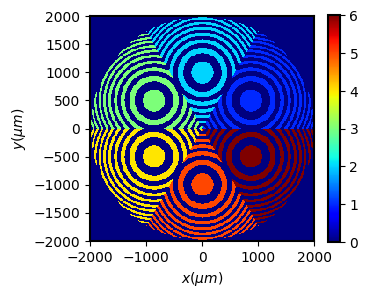

In [39]:
i_stokes_analyzer = Stokes_analyzer(x0, y0, wavelength)
i_stokes_analyzer.stokes_analyzer_lens_indexes(focal, r_shift, num_sectors=6)
i_stokes_analyzer.draw(kind='amplitude', has_colorbar='vertical', colormap_kind='jet'); plt.clim(vmin=0)

# Generación del fotodectector

In [42]:
self = i_stokes_analyzer

In [43]:
def generate_circular_fotodetectors(self, focal, r_shift, num_sectors=6,     detector_radius,  has_draw=True):
    """calcula la distribución de intensidad, y parámetros de polarización producida por una lente vectorial

    Arguments:
        focal (float): focal length of lens
        r_shift (float): distance between the center of the mask and the center of the FZP lens
        num_sectors (int): Numbers of sectors in the lens
        has_draw (bool): If True drasw figures

    """
    pass

SyntaxError: non-default argument follows default argument (<ipython-input-43-b9e9e548f02b>, line 1)

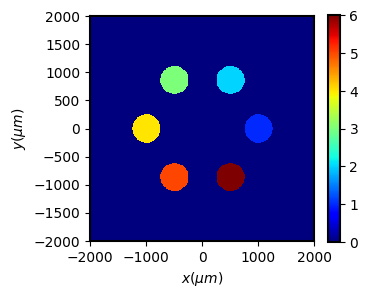

In [44]:
    x0 = self.x
    y0 = self.y
    wavelength = self.wavelength

    theta = np.linspace(0,2*np.pi, num=num_sectors, endpoint=False) 
    x_center_detectors = r_shift * np.cos(theta)
    y_center_detectors = r_shift * np.sin(theta)

    # radio maximo del detector
    #rmax_det = r_shift * np.sin(360 * degrees / (2 * num_sectors))
    #r_det = 0.82 * rmax_det  # reduce el tamaño del detector

    detector = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
    detector_index = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
    for i in range(num_sectors):
        detector.circle(r0=(x_center_detectors[i], y_center_detectors[i]), radius=radius_detector, angle=0 * degrees)
        detector_index.u =  detector_index.u + (i+1) *detector.u

    
detector_index.draw(kind='amplitude', has_colorbar='vertical', colormap_kind='jet'); plt.clim(vmin=0)

In [ ]:
def generate_square_fotodetectors(focal, r_shift, num_sectors=6, detector_size = 250*um,  has_draw=True):
    """calcula la distribución de intensidad, y parámetros de polarización producida por una lente vectorial

    Arguments:
        focal (float): focal length of lens
        r_shift (float): distance between the center of the mask and the center of the FZP lens
        num_sectors (int): Numbers of sectors in the lens
        has_draw (bool): If True drasw figures

    """

In [45]:
    x0 = i_stokes_analyzer.x
    y0 = i_stokes_analyzer.y
    wavelength = i_stokes_analyzer.wavelength

    theta = np.linspace(0,2*np.pi, num=num_sectors, endpoint=False) 
    x_center_detectors = r_shift * np.cos(theta)
    y_center_detectors = r_shift * np.sin(theta)

    # radio maximo del detector
    #rmax_det = r_shift * np.sin(360 * degrees / (2 * num_sectors))
    #r_det = 0.82 * rmax_det  # reduce el tamaño del detector

    detector = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
    detector_index = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
    for i in range(num_sectors):
        detector.square(r0=(x_center_detectors[i], y_center_detectors[i]), size=detector_size, angle=0 * degrees)
        detector_index.u =  detector_index.u + (i+1) *detector.u

    
detector_index.draw(kind='amplitude', has_colorbar='vertical', colormap_kind='jet'); plt.clim(vmin=0)

In [46]:
def generate_fotodetectors_slices(self, focal, r_shift, num_sectors=6, fill_sectors=0.5, detector_radius = 2*mm,  has_draw=True):
    """calcula la distribución de intensidad, y parámetros de polarización producida por una lente vectorial

    Arguments:
        focal (float): focal length of lens
        r_shift (float): distance between the center of the mask and the center of the FZP lens
        num_sectors (int): Numbers of sectors in the lens
        has_draw (bool): If True drasw figures

    """
    

In [95]:
fill_sectors = 0.5
radius_size = 500*um

-0.5235987755982988 0.5235987755982988
6.021385919380437 0.2617993877991494
4388
0.5235987755982988 1.5707963267948966
0.7853981633974483 1.308996938995747
5934
1.5707963267948966 2.617993877991494
1.832595714594046 2.356194490192345
5934
2.6179938779914944 3.665191429188092
2.8797932657906435 3.4033920413889427
4388
3.665191429188092 4.71238898038469
3.926990816987241 4.45058959258554
6062
4.712388980384689 5.759586531581287
4.974188368183839 5.497787143782137
5937


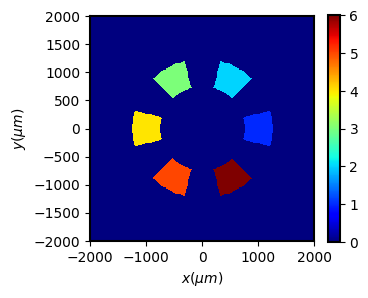

In [106]:
    x0 = self.x
    y0 = self.y
    wavelength = i_stokes_analyzer.wavelength

    R = np.sqrt((self.X)**2 + (self.Y)**2)
    Theta = np.arctan2(-self.Y, -self.X)    + np.pi
    
    angle_size_maximum = 2*np.pi/num_sectors
    angle_center = np.linspace(0,2*np.pi, num=num_sectors, endpoint=False) 
    # radio maximo del detector
    #rmax_det = r_shift * np.sin(360 * degrees / (2 * num_sectors))
    #r_det = 0.82 * rmax_det  # reduce el tamaño del detector

    detector = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
    detector_index = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
    for i in range(num_sectors):
        print(angle_center[i] - angle_size_maximum/2, angle_center[i] + angle_size_maximum/2)
        
        theta_min = angle_center[i] - angle_size_maximum/2*fill_sectors
        theta_max = angle_center[i] + angle_size_maximum/2*fill_sectors
        if theta_min < 0:
            theta_min = theta_min + 2*np.pi
        if theta_max < 0:
            theta_max = theta_max + 2*np.pi
        
        print(theta_min, theta_max)
            
        #if theta_min > theta_max:
        #    theta_min, theta_max = theta_max, theta_min
        if theta_min < theta_max:
            i_pasa = np.bitwise_and(Theta > theta_min, Theta < theta_max)
        else:
            i_pasa = 1-np.bitwise_and(Theta > theta_max, Theta < theta_min)
        print(i_pasa.sum())
        detector.u[i_pasa] = 1
        detector_index.u =  detector_index.u + (i+1) * i_pasa
        
    detector_index.u[R<r_shift-radius_size/2]=0
    detector_index.u[R>r_shift+radius_size/2]=0
    
    self.u = detector_index.u


detector_index.pupil()
    
detector_index.draw(kind='amplitude', has_colorbar='vertical', colormap_kind='jet'); plt.clim(vmin=0)

In [97]:
angle_center, angle_size_maximum

(array([0.        , 1.04719755, 2.0943951 , 3.14159265, 4.1887902 ,
        5.23598776]),
 1.0471975511965976)

In [69]:
Theta.min()

-3.137671105065033